In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
class KMeans:
    def __init__(self, n_clusters = 3, max_iter = 100):
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.inertia = None

    def assign_clusters(self , X):
        cluster_group = []
        for row in X:
            distances = [np.sqrt(np.sum((row - centroid) ** 2)) for centroid in self.centroids]
            cluster_group.append(np.argmin(distances))
        return np.array(cluster_group)
    
    def move_centroids(self, X, cluster_group):
        
        new_centroids = []
        
        for i in range(self.n_clusters):
            points = X[cluster_group == i]
            
            if len(points) > 0:
                new_centroids.append(points.mean(axis = 0))
            else:
                new_centroids.append(self.centroids[i])
        
        return np.array(new_centroids)
            
    
    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]
        
        for _ in range(self.max_iter):
            
            cluster_group = self.assign_clusters(X)
            
            old_centriods = self.centroids.copy()
            
            self.centroids = self.move_centroids(X, cluster_group)
            
            if np.allclose(old_centriods, self.centroids):
                break
        
        self.inertia = sum(np.sum((X[cluster_group == i] - self.centroids[i]) ** 2) for i in range(self.n_clusters))
        
        return cluster_group
    
    def elbow_method(self, X, max_k = 10):
        inertias = []
        for k in range(1, max_k  + 1):
            kmeans = KMeans(n_clusters=k, max_iter=self.max_iter)
            kmeans.fit_predict(X)
            inertias.append(kmeans.inertia)
        
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_k + 1), inertias, marker = 'o', linestyle = '--')
        plt.title("Elbow Method")
        plt.xlabel("Number of Cluster")
        plt.ylabel("Inertia")
        plt.grid
        plt.show()
        
        return inertias

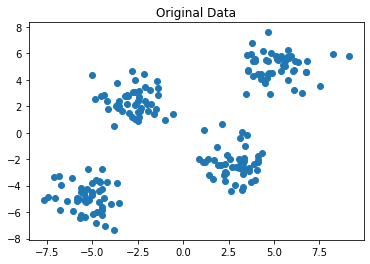

In [15]:
from sklearn.datasets import make_blobs

centroids = [(-5, -5), (5, 5), (-2.5, 2.5), (2.5, -2.5)]

cluster_std = [1, 1, 1, 1]

X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data")
plt.show()

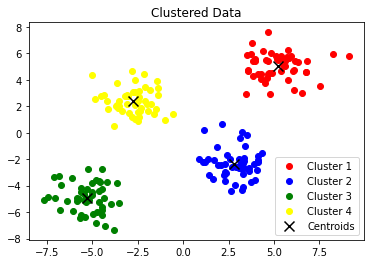

In [20]:
km = KMeans(n_clusters=4, max_iter=500)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='blue', label='Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color='green', label='Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color='yellow', label='Cluster 4')
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title("Clustered Data")
plt.legend()
plt.show()

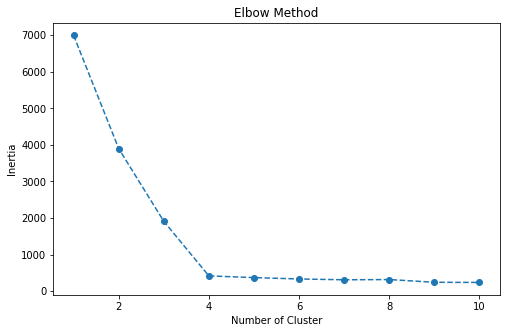

[6994.7054474170445,
 3898.363949146429,
 1909.7920312408453,
 417.8509516537456,
 371.5702809358241,
 333.4070518207907,
 311.56512159010265,
 317.7217489266206,
 243.49160836004813,
 238.70325821851878]

In [22]:
km.elbow_method(X, max_k=10)